In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

PLACEMENT CSV DATASETS

In [140]:
df=pd.read_csv('data/placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [142]:
df.shape

(100, 4)

In [143]:
# class imbalance means data may classes kitni hai
df.placement.value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [144]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [145]:
x=df.drop(columns=['Unnamed: 0'],inplace=True)
y=df['placement']

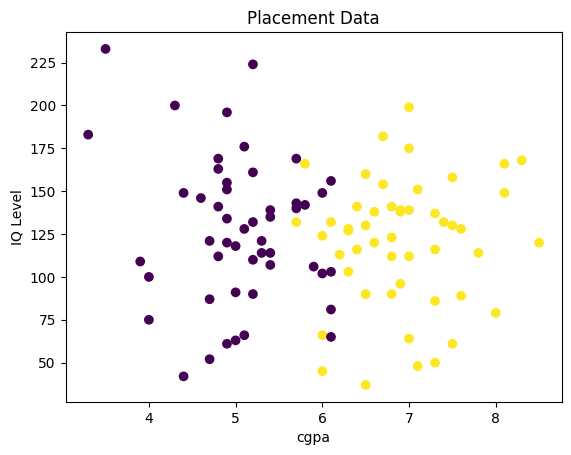

In [146]:
plt.title('Placement Data')
plt.xlabel('cgpa')
plt.ylabel('IQ Level')
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])
plt.savefig('placementscatterplot')
plt.show()

In [147]:
x=df.drop(columns=['placement'])
y=df['placement']
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [148]:
# train split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [149]:
# linear model selection
model=LogisticRegression()

In [150]:
model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [151]:
y_pred=model.predict(x_test)

In [152]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
79,1,1
75,0,0
63,1,1
15,0,0
38,1,1
11,1,1
40,0,0
45,1,0
39,0,0
62,0,0


In [153]:
# metrics
print('ACCURACY SCORE',accuracy_score(y_test,y_pred))
print('CONFUSION MATRIX SCORE \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))


ACCURACY SCORE 0.9
CONFUSION MATRIX SCORE 
 [[12  1]
 [ 1  6]]
classification report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



Titanic DATASETS

In [2]:
df=pd.read_csv('data/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


categorical data may hum mode use kerty hai
agr mean or median may jiska diff km huga wo lygy
mode means repeatative data in datasets
median means middle value of datasets
mean means average

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.describe(include='object')

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [7]:
df['sex'].nunique()  # number of uiniwque

2

In [8]:
df['sex'].unique() # unique

array(['male', 'female'], dtype=object)

In [9]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df['embark_town'].nunique()

3

In [11]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [12]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [13]:
df['age'].mean()

np.float64(29.69911764705882)

In [14]:
df['age'].median()

np.float64(28.0)

<Axes: xlabel='age', ylabel='Count'>

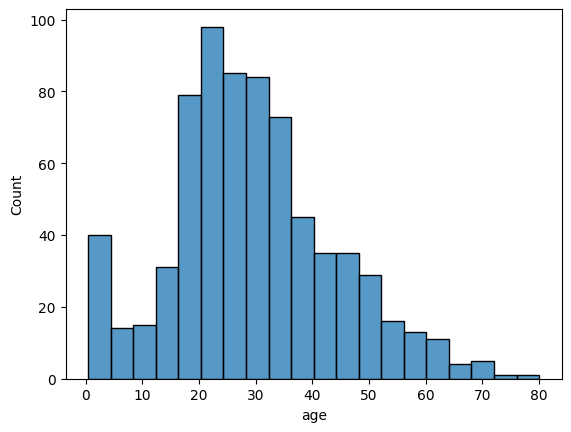

In [15]:
sns.histplot(df['age'])

In [16]:
df['age']=df['age'].fillna(df['age'].median())


In [17]:
# df['deck'].mode()
# df['deck'].mode()[0]
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

In [18]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [19]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [21]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

categorical
nominal vs ordinal
ordinal -> with order 
03 types of encoding
one hot encoding -> nominal category mayu use kerty hai
label encoding ko hum srf output coloumn k liye use kerty hai
ordinal encoding

In [30]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [31]:
x=df.drop(columns=['survived','age','fare'])
y=df['survived']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [36]:
x_test.columns

Index(['pclass', 'sibsp', 'parch', 'adult_male', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes'],
      dtype='object')

In [37]:
model=LogisticRegression()

In [38]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
x_train

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
661,3,0,0,True,True,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
393,1,1,0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
266,3,4,1,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
144,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
446,2,0,1,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2,1,1,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,True,True
165,3,0,2,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
7,3,3,1,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
219,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [28]:
x_test.columns

Index(['pclass', 'sibsp', 'parch', 'adult_male', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes'],
      dtype='object')

In [42]:
# y_pred=model.predict(x_test)
# y_pred=model.predict(X_test)
# y_pred=model.predict([[1, 0, 3, True, False, True,
#        'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
#        'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
#        'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes']])
# y_pred
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1])

In [43]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
246,0,0
588,0,0
472,1,1
71,0,0
654,0,0
...,...,...
284,0,0
727,1,1
599,1,1
525,0,0


In [44]:
# metrics
print('ACCURACY SCORE',accuracy_score(y_test,y_pred))
print('CONFUSION MATRIX SCORE \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

ACCURACY SCORE 1.0
CONFUSION MATRIX SCORE 
 [[103   0]
 [  0  76]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        76

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

